# DAO2NFT: increase DAO Health using reputation NFTs

## Research Topic/Question
- a. How can we make DAOs well functioning organisations?
    - i. Increasing DAO member (stakeholder) engagement
    - ii. Identify reward systems for different stakeholders
    - iii. Balance parameter settings in Grant logistics
- b. Can we derive assumptions of what might increase DAO's health?
    - i. Under what conditions will stakeholder participation grow?
    - ii. Under what conditions is grant funding well spent?

## DAO Agents

Stakeholders of DAOs are:
- Investors (Stakers)
- DAO Protocol initiators (Ambassadors)
- DAO Consumers
- DAO Producers
- DAO Intermediairies (Market Makers)
- Producer Aggregators (Unions)
- Proposal Applicants (Grantees)

## General policies and mechanisms for a DAO, tuned to Ocean
- Investors
    - Stake on high performance datasets
    - Want to know what datasets are (going to be) valuable
    - Provide liquidity for an ROI
    - Unstake on poor performing datasets

- Ambassadors
    - Want to grow the ecosystem
    - Help newcomers onboard
    - Perform parameter adjustments for funding projects
    - Guide grantees in project proposals

- Consumers
    - Want good datasets for a fair price
    - Look for bargains
    - Want to be guided to curated datasets

- Producers
    - Want a fair price for their data
    - Will bargain for liquidity
    - Want to know what the market is looking for

- Market Makers
    - Want to promote datasets for market needs
    - Incentivise producers to provide by delivering needs
    - Incentivise consumers to buy by delivring curated lists of datasets

- Unions
    - Aggregate individual datasets in order to have more chance of being recognized as valuable
    - Make use of Market Makers curated lists

- Grantees ()
    - Want to earn rewards for growing the ecosystem
    - Want to know the best way for success using the rules of the DAO (Game theory)

### Test agents

- Voters
- Projects
- Team Members


### Approach

Our model is based on the assumption that the ecosystem will grow when stakeholders thave trust in the value contributors provide for the DAO. Therefore we model an NFT-based approach, where projects that receive grants from the DAO can earn reputation NFTs. 

These NFTs are minted when a funded project is progressing and delivering value by simple metrics like posting to Discord/Github in a SourceCred-manner, delivering to milestones, finishing in time and reaching ROI. NFTs are then fractioned and distributed to the team members, so they earn reputation value. In next grant rounds these NFTs are signaling voters to trust certain projects or team members holding such NFTs, in order to accumulate Yes-votes for these projects where team members participate in.

### Loopy

![Loopy](LoopyNFT.gif)


## Policies and mechanisms

#### projects policy
This will set up the projects in a round, with milestones, tasks and weight, distributed according to latest OceanDAO round statistics.
Snapshot:
```python
    # new Grants round each month
    if (current_timestep % timestep_per_month) == 0:
      round += 1
      # generate new projects
      project_weights, total_stakeholders, total_votes = generate_project_weights(round)
      
      # recurring means how many projects will continue for the next round
      # recurring = params['recurring_factor']
      recurring = 0.5
```
#### accounting policy
The `Curator` is responsible for auditing the projects at the end of a round and placing a `Verdict`, which will trigger accounting actions on the `Voters` by rewarding and penalising them according to these `Verdicts`. The more voters get penalised the more likely they vote for better performing projects or leave the ecosystem in the long run...
Snapshot:
```python
      curator = Curator('Curator OCEANDao', 1, 0)
      for project in projects.values():
        (delayed, delivered, in_progress, finished) = curateProject(project, current_timestep)
        if not finished:
          if delayed >= 0 and delayed < 3:
            curator.addAudit(project.name, Verdict.DELAYED)
          if delayed >= 3 and delayed < 7:
            curator.addAudit(project.name, Verdict.MILESTONES_NOT_MET)
          if delayed >= 7 and delayed < 14:
            curator.addAudit(project.name, Verdict.FAILED)
          if delayed >= 14 and delayed < 21:
            curator.addAudit(project.name, Verdict.ADVERSARY)
          if delayed > 21:
            curator.addAudit(project.name, Verdict.RUGPULL)
        else:
          curator.addAudit(project.name, Verdict.DELIVERED)
```
#### values policy
The `weights` of the projects determine the NFT earnings and hence signal `Voters` to have more confidence in one `Project` or `Team Member` over the other. A parameter sweep will influence the treshold (`performer_ratio`) of upping the total yes- or no-votes for that matter.
Snapshot:
```python
      # if many projects have weights above avg, yes votes will go up
      for weight in nft_values:
        if weight > avg:
          nft_performer += 1
      nft_earn_ratio = nft_performer/total
      # the performance level is driver for yes or no votes, assuming linear to the square of the ratio
      if (nft_earn_ratio > params['performer_ratio']):
        yes_votes = (1 + (nft_earn_ratio ** 2)) * yes_votes
        no_votes = (1 - (nft_earn_ratio ** 2)) * no_votes
      else:
        yes_votes = (1 - (nft_earn_ratio ** 2)) * yes_votes
        no_votes = (1 + (nft_earn_ratio ** 2)) * no_votes
      return ({
          'weight_rate': weight_rate,
          'yes_votes': yes_votes,
          'no_votes': no_votes,
          'nft': nft
      })
```

In [1]:
%pip install radcad
%pip install matplotlib
%pip install enforce_typing
%pip install names
%pip install networkx
%pip install scipy
%pip install holoviews
%pip install panel

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



Voter={
name=Voter Elizabeth; weight=5.115447743249364e-05; wallet=
Wallet={
USD=0; OCEAN=205.231763; total_USD_in=0; total_OCEAN_in=205.231763 
/Wallet}; votes=('Project Antillon', 0.11736992169964565),('Project Nero', 0.22892471672090398),('Project Jones', 0.23997570215831188),('Project Hummel', 0.4412382118045215),('Project Douglas', 0.8373609887101086),('Project Patterson', 1.5575682564953988),('Project Caldera', 2.117006633290239),('Project Greenlief', 2.8237362890005784),('Project Snyder', 4.954013912297518),('Project Hassinger', 8.31060617101107),('Project Dawson', 8.33534174835906),('Project Budzynski', 13.29480446028446),('Project Nye', 18.862352261638335),('Project Thompson', 19.800412737175762),('Project Smith', 26.992543758481002),('Project Klos', 32.79265977536509),('Project Pickett', 34.2290814632129)
/Voter}


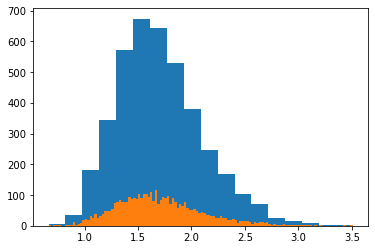

In [1]:
# tryouts - a voter has some OCEAN (from Ocean rounds) and mirror project weight with votes, 50 pct weight suggests votes 
# was 50 pct in actual round. Weight for for example for Voter Elizabeth was voting on project Pickett (last one) with 34.2 tokens from total 
# voted tokens 2 million 'ish' but names are different in every run as model assigns new names. 
# plot shows probabilities (not meaningful) orange shows distribution of tokens in round

import random
from model.state_variables_model2 import genesis_state
voters = genesis_state['voters']
print(voters[1])

## Run Model



In [2]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import enforce_typing

# Experiments
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

### Simulation setup: 10 Grant rounds, 1 run because of timing (2 minutes on turbo MacBook)

running file: sim_setup.py
SIMULATION_TIME_STEPS:  305
MONTE_CARLO_RUNS:  1
end of file: sim_setup.py


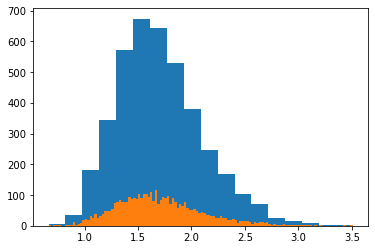

In [3]:
from model.state_variables_model2 import genesis_state
from model.partial_state_update_block_model2 import partial_state_update_block
from model.sim_setup import SIMULATION_TIME_STEPS, MONTE_CARLO_RUNS
from model.sys_params_model2 import params

In [4]:
# curator curates projects with verdicts win/loose

model = Model(initial_state=genesis_state, state_update_blocks=partial_state_update_block, params=params)

simulation = Simulation(model=model, timesteps=SIMULATION_TIME_STEPS, runs=MONTE_CARLO_RUNS)

simulations = [simulation]
experiment = Experiment(simulations)
# Select the Pathos backend to avoid issues with multiprocessing and Jupyter Notebooks
experiment.engine = Engine(backend=Backend.PATHOS, drop_substeps=True)

result = experiment.run()

## Interpretation of Results

In [5]:
df = pd.DataFrame(result)
df.head()

,dao_members,voters,grant_cap,projects,yes_votes,no_votes,valuable_projects,unsound_projects,dao_graph,nft,weight_rate,round,simulation,subset,run,substep,timestep
0,100,[\nVoter={\nname=Voter Martha; weight=3.075603...,200000,{'Project Kratky': Project={ name=Project Kra...,30.00,10.00,0,0,"(Round 1, Project Kratky, Project Rosenbaum, P...",{},{},1,0,0,1,0,0
1,100,[\nVoter={\nname=Voter Martha; weight=3.075603...,200000,{'Project Kratky': Project={ name=Project Kra...,30.00,10.00,0,0,"(Round 1, Project Kratky, Project Rosenbaum, P...","{'Phyllis': (OceanNFT.SHRIMP, 0.00037029178168...","{'Project Kratky': 0.001110875345055784, 'Proj...",1,0,0,1,3,1
2,100,[\nVoter={\nname=Voter Martha; weight=3.075603...,200000,{'Project Kratky': Project={ name=Project Kra...,30.00,10.00,0,0,"(Round 1, Project Kratky, Project Rosenbaum, P...","{'Phyllis': (OceanNFT.SHRIMP, 0.00035091677416...","{'Project Kratky': 0.059425014324363735, 'Proj...",1,0,0,1,3,2
3,100,[\nVoter={\nname=Voter Martha; weight=3.075603...,200000,{'Project Kratky': Project={ name=Project Kra...,30.00,10.00,0,0,"(Round 1, Project Kratky, Project Rosenbaum, P...","{'Phyllis': (OceanNFT.SHRIMP, 0.05970933532185...","{'Project Kratky': 0.10678112775277865, 'Proje...",1,0,0,1,3,3
4,100,[\nVoter={\nname=Voter Martha; weight=3.075603...,200000,{'Project Kratky': Project={ name=Project Kra...,30.00,10.00,0,0,"(Round 1, Project Kratky, Project Rosenbaum, P...","{'Phyllis': (OceanNFT.SHRIMP, 0.05658358433696...","{'Project Kratky': 0.09543290824587514, 'Proje...",1,0,0,1,3,4


### Take a look at a typical Project structure, with Milestones, Tasks and Team Members, scored by a `weight` attribute

In [9]:
df1 = df[df['round'] == 1]
p1 = df1['projects']
print(p1[1]['Project Kratky'])



Project={
name=Project Kratky; weight=0.06372196287956136; wallet=
Wallet={
USD=0; OCEAN=233.000000; total_USD_in=0; total_OCEAN_in=233.000000 
/Wallet};
 milestones=
Milestone={
nr=1; tasks=
Task={
name=TaskType.PLAN; weight=0.05; workers=TeamMemberType.PROJECT_LEAD; planned=7; actual=0; delivered?=False 
/Task},
Task={
name=TaskType.DESIGN; weight=0.05; workers=TeamMemberType.DESIGNER; planned=10; actual=0; delivered?=False 
/Task}; planned=0; actual=0; delivered?=False 
/Milestone},
Milestone={
nr=2; tasks=
Task={
name=TaskType.RESEARCH; weight=0.05; workers=TeamMemberType.LEAD_ENGINEER; planned=13; actual=0; delivered?=False 
/Task},
Task={
name=TaskType.CODE; weight=0.05; workers=TeamMemberType.ENGINEER; planned=14; actual=0; delivered?=False 
/Task}; planned=0; actual=0; delivered?=False 
/Milestone};
 team=
TeamMember={
name=Phyllis; type=TeamMemberType.PROJECT_LEAD; current_weight=0.00037029178168526136; weights=<model.parts.agents.util.nft.Weight object at 0x7ff371038a60> 
/T

### What does `weight` mean?
Weight is a `weighted` aggregation of project and/or team member outputs. Each project gets an initial weight according to Ocean DAO Grant Rounds voting statistics. So if a project gets 10% of all Yes-votes, it's initial weight is 0.10. This initial weight is equally being divided amongst the team members, so in a 'big' project with 5 team members, each initial individual weight is project weight divided by 5.
Weights are accumulated during the grants round, by delivering value like finishing tasks and milestones and doing actions like posting to Discord and Github (SourceCred-like). Weight is modeled by a class with a decay function, so previous actions will decay in weight-value according to a partial reverse sigmoid decay function:

```python
def reverse_sigmoid(x):
    z = np.exp(x)
    sig = 2 / (1 + z)
    return sig

class Weight:
    def __init__(self, weight: float, timestep: int):
        self.weight: float = weight
        self.genesis_timestep: int = timestep

    def decay(self, current_timestep):
        time_passed = current_timestep - self.genesis_timestep
        self.weight *= reverse_sigmoid(0.1 * time_passed)
```

`Projects` and `Team Members` have weights modeled as a list of individual `Weight` objects, that decay in value according to this function by subtracting the genesis timestep of the weight (when the action happened) from the current timestep. At each point in time, the `current_weight` of a `Project` or `Team Member` is calculated using a `reduce` function, in fact aggregating all the accumulated, decayed weight objects to a single score: the momentary standing of the `Project` or `Team Member`.

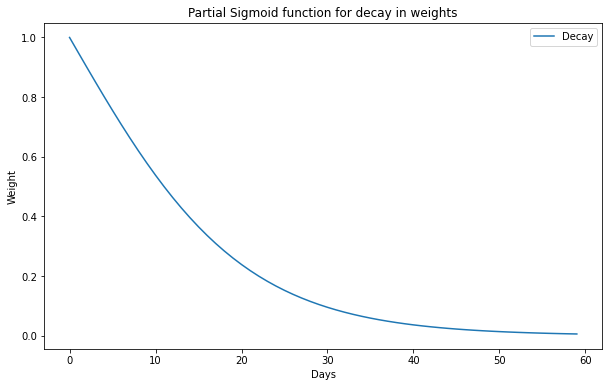

In [8]:
from model.plot_utils import decay_plot
decay_plot()

In [11]:
from model.parts.agents.Project import Project

# accumulated, decayed weight of the project at timestep 29 (just before end of the round)
project: Project = p1[29]['Project Kratky']
project.reduceWeights(29)
project.current_weight

11.747618594312804

### NFT distribution
Again, our model is based on the assumption that the ecosystem will grow when stakeholders thave trust in the value contributors provide for the DAO. Therefore we model an NFT-based approach, where projects that receive grants from the DAO can earn reputation NFTs. 

These NFTs have certain tresholds, and get minted when a `weight` or cred-level (SourceCred inspired) has been reached, modeled like so:
```python
def mint_nft(cred):
  if cred > 0 and cred < 0.5:
    return OceanNFT.SHRIMP
  if cred > 0.5 and cred < 1.0:
    return OceanNFT.OYSTER
  if cred > 1.0 and cred < 2.0:
    return OceanNFT.FISH
  if cred > 2.0 and cred < 3.0:
    return OceanNFT.DOLPHIN
  if cred > 3.0 and cred < 5.0:
    return OceanNFT.FISHERMAN
  if cred > 5.0 and cred < 10.0:
    return OceanNFT.MANTA
  if cred > 10 and cred < 50:
    return OceanNFT.OCEAN
  if cred > 50:
    return OceanNFT.ATLANTIS
  return OceanNFT.SHRIMP
```

In [13]:
# get the NFT by Project or Team Member with the weight level at the end of round 1
nft = df['nft']
nft[60]
print("Sally: ", nft[60]['Sally'])
print("Project Kratky: ", nft[60]['Project Kratky'])



Sally:  (<OceanNFT.FISHERMAN: 5>, 3.7200047196806363)
Project Kratky:  (<OceanNFT.OCEAN: 7>, 10.963691288836511)


## Top 10 performers and NFT levels over 10 rounds

In [14]:
# reduce the (NFT, weight) tuples to the weights
nft = nft.apply(pd.Series)
nfts = nft.replace(np.nan,0)
s = nfts.shape
for k in range(s[0]):
  for m in range(s[1]):
    if not isinstance(nfts.loc[k][m], int) :
      nfts.loc[k][m] = nfts.loc[k][m][1]

# sort the projects and team members to weight descending
sorted_projects = sorted(dict(nfts.max(axis=0)).items(), key=lambda x: x[1], reverse=True)
sorted_teammembers = [x for x in sorted_projects if 'Project' not in x[0]]


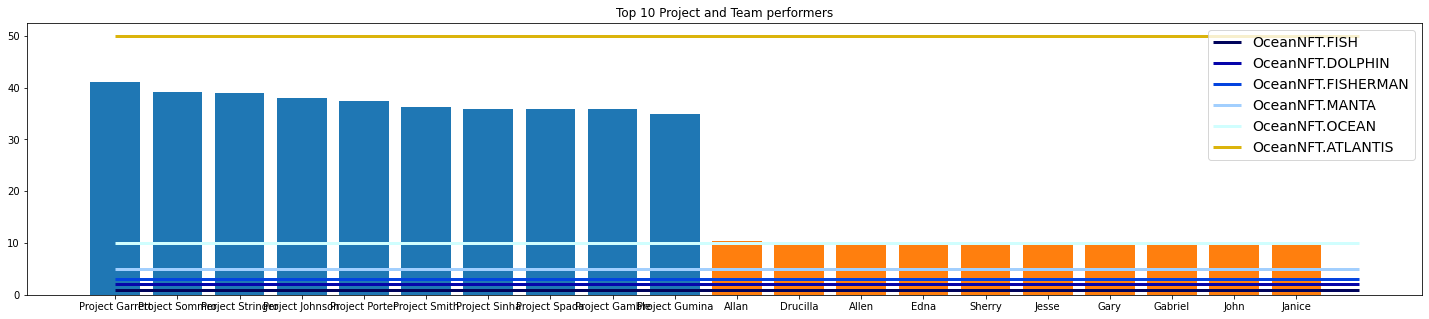

In [15]:
# plot the top performers
fig, ax = plt.subplots(figsize=(25, 5))
x, y = zip(*sorted_projects[:10])
plt.bar(x, y)

x, y = zip(*sorted_teammembers[:10])
plt.bar(x, y)
plt.title("Top 10 Project and Team performers")

ax.hlines(y=1, xmin=0, xmax=20, linewidth=3, color='xkcd:dark blue', label="OceanNFT.FISH")
ax.hlines(y=2, xmin=0, xmax=20, linewidth=3, color='xkcd:royal blue', label="OceanNFT.DOLPHIN")
ax.hlines(y=3, xmin=0, xmax=20, linewidth=3, color='xkcd:blue', label="OceanNFT.FISHERMAN")
ax.hlines(y=5, xmin=0, xmax=20, linewidth=3, color='xkcd:baby blue', label="OceanNFT.MANTA")
ax.hlines(y=10, xmin=0, xmax=20, linewidth=3, color='xkcd:pale blue', label="OceanNFT.OCEAN")
ax.hlines(y=50, xmin=0, xmax=20, linewidth=3, color='xkcd:gold', label="OceanNFT.ATLANTIS")

ax.legend(fontsize = 14)
plt.show()


### Visualise the connections between DAO Rounds, Projects and Team members accoriding to weights

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
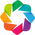

In [16]:
import holoviews as hv
import holoviews.plotting.mpl
from holoviews import opts, dim
import panel as pn
hv.extension("bokeh")


In [17]:
import networkx as nx

dao = [nx.Graph() for x in range(10)]
for i in range(10):
  dfx = df[df['round'] == i + 1]
  dfx.reset_index(drop=True, inplace=True)
  dao[i] = dfx['dao_graph'][29]



In [18]:
kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))
top = nx.bipartite.sets(dao[5])[0]
pos = nx.bipartite_layout(dao[5], top)

# graph = hv.Graph.from_networkx(dao[3], nx.fruchterman_reingold_layout)
# graph.opts(node_color='type', edge_color='weight', cmap='blue')

graph = hv.Graph.from_networkx(dao[5], nx.circular_layout).opts(opts.Graph(inspection_policy='nodes', tools=['hover'], title='Projects Round 5',
        edge_cmap='viridis'))
hv.element.graphs.layout_nodes(graph, layout=nx.layout.bipartite_layout, kwargs={'nodes': top})

:Graph   [start,end]

### Experiment: simulate the project dynamics over 10 rounds, base scenario

Insights:
- Project `weight` is fluctuating during a round, because of strong decay and lagging deliverables
- Recurring projects can build up more weight because of a head start

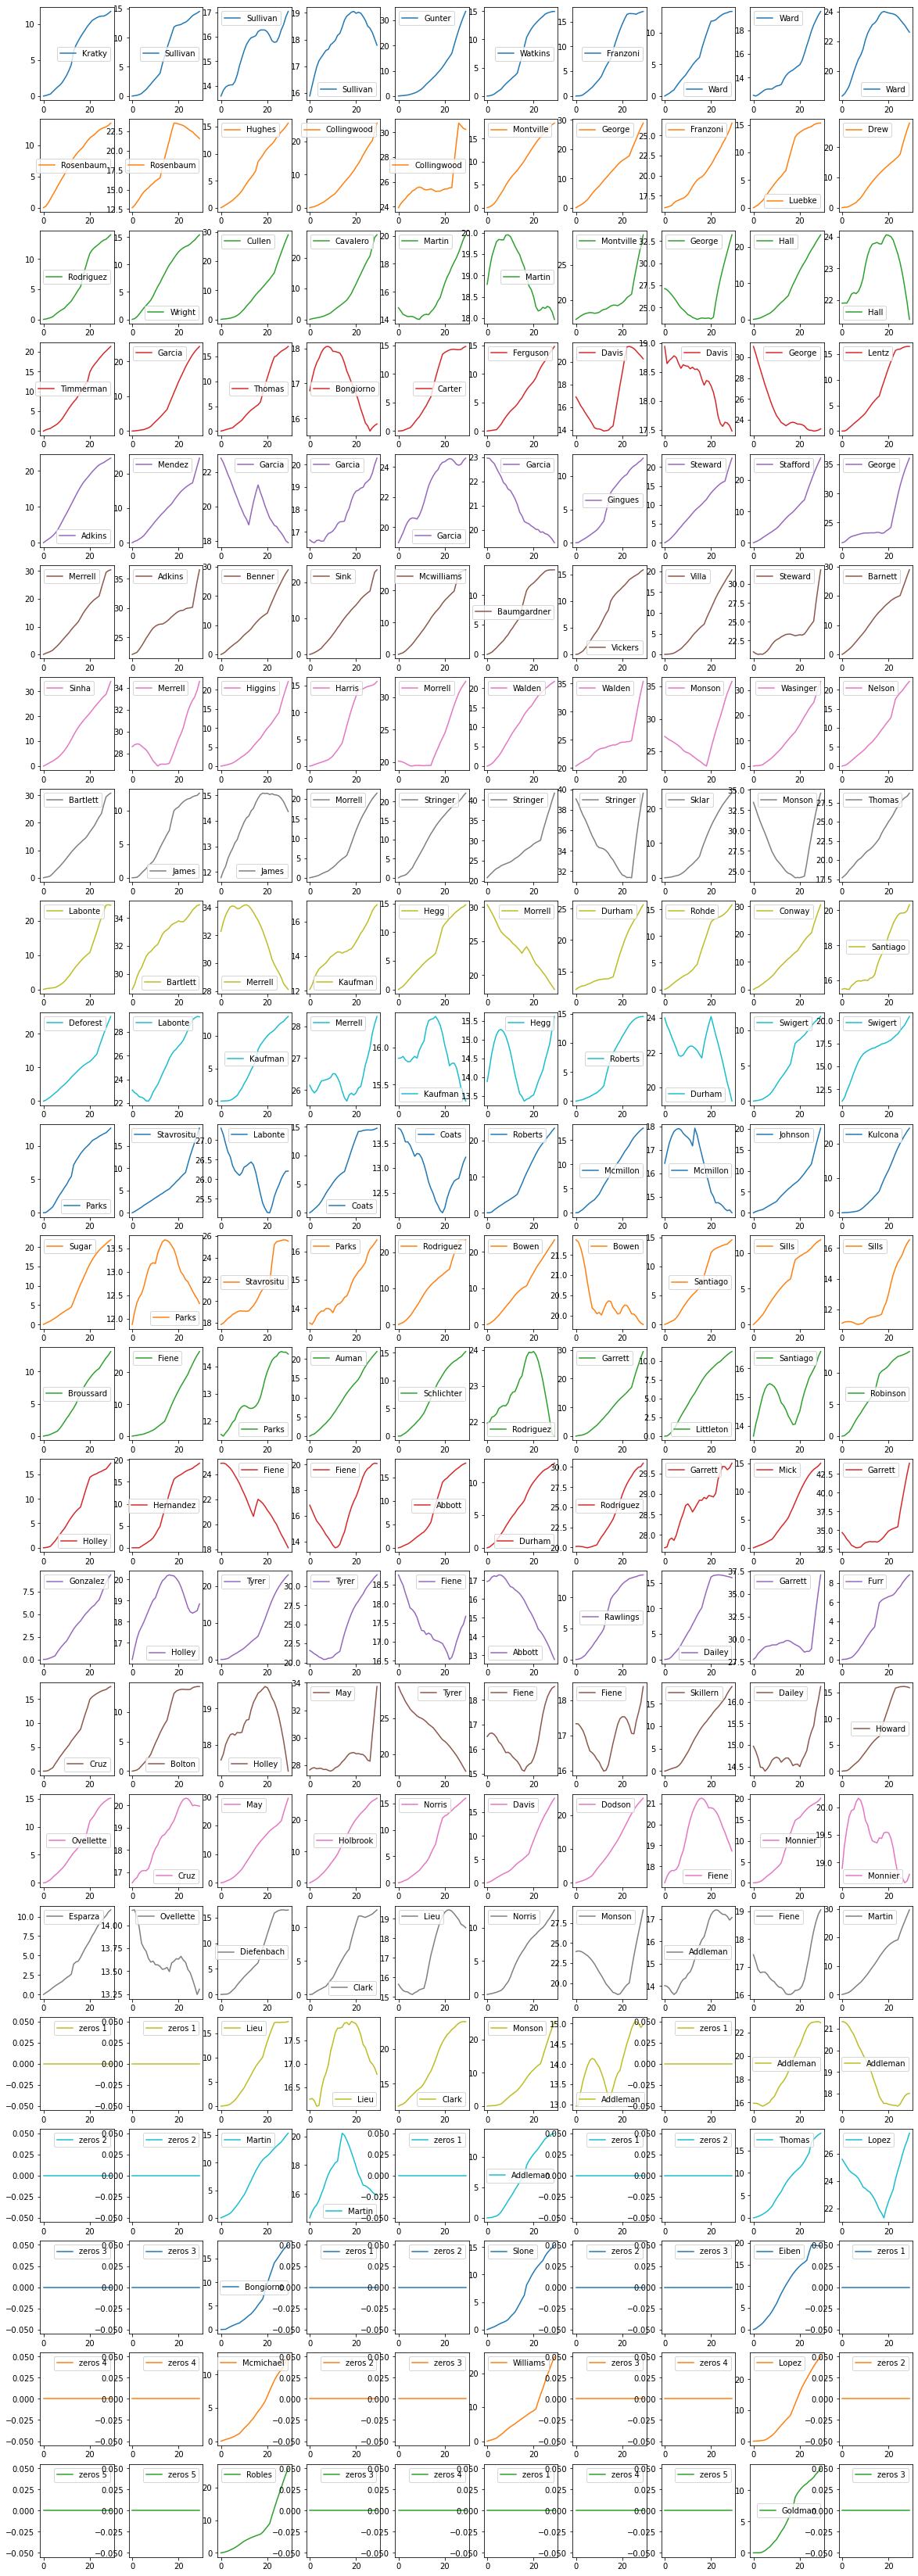

In [19]:
from model.plot_utils import project_plot, project_dfs

project_plot(df, 10)

#### Looking at DAO dynamics

Voters get penalised when they vote for unsound projects or rewarded when voting for performing projects

```python
def accounting(curator:Curator, voters:List[Voter]) -> List[Voter]:
  accounted_voters = []
  dverdicts = dict(curator.audits)
  for voter in voters:
    dvotes = dict(voter.votes)
    matches = [(dverdicts[k], dvotes[k])  for k in dverdicts.keys() & dvotes.keys()]
    for match in matches:
      status = match[0]
      tokens = match[1]
      if status == Verdict.DELIVERED:
        # print("Voter wins: ", voter.name, tokens * 0.1)
        voter.winTokens(tokens * 0.1)
      else:
        # print("Voter loses: ", voter.name, tokens * status.value * 0.05)
        voter.slashTokens(tokens * status.value * 0.05)
    accounted_voters.append(voter)
  return accounted_voters
```

In [20]:
voters = df['voters']
v = voters.apply(pd.Series)
print(v[2][4])


Voter={
name=Voter John; weight=8.21250767367006e-05; wallet=
Wallet={
USD=0; OCEAN=329.485808; total_USD_in=0; total_OCEAN_in=329.485808 
/Wallet}; votes=('Project Esparza', 0.18842952386492717),('Project Ovellette', 0.3675232525333064),('Project Kratky', 0.3852648671996073),('Project Cruz', 0.7083783047423545),('Project Gonzalez', 1.3443268098063899),('Project Holley', 2.500571191566526),('Project Rosenbaum', 3.3987119199976137),('Project Broussard', 4.533318901056247),('Project Sugar', 7.953336503906561),('Project Rodriguez', 13.342119864746142),('Project Parks', 13.381831172334241),('Project Deforest', 21.343915357969216),('Project Timmerman', 30.28223930087),('Project Labonte', 31.788232371346407),('Project Bartlett', 43.33471552728439),('Project Adkins', 46.82878037382496),('Project Sinha', 52.646412115270664),('Project Merrell', 54.952490630028976)
/Voter}


In [64]:
import matplotlib.pyplot as plt

# plot the data

pd.options.mode.chained_assignment = 'warn'

df1 = df[(df['run'] == 1) & (df['subset'] == 0)]
df2 = df[(df['run'] == 1) & (df['subset'] == 1)]
df3 = df[(df['run'] == 1) & (df['subset'] == 2)]


voters1 = df1["voters"]
voters1 = voters1.apply(pd.Series)

voters1.dropna(axis='columns', inplace=True)

names1 = []
s = voters1.shape
for k in range(s[0]):
  for m in range(s[1]):
    if k == 0:
      names1.append(voters1.loc[k][m].name)
    if voters1.loc[k][m] != 0:
      voters1.loc[k][m] = voters1.loc[k][m].wallet.OCEAN()
voters1.columns = names1


In [65]:
voters1

,Voter Martha,Voter Teresa,Voter John,Voter Bernice,Voter Jeremy,Voter Daryl,Voter John,Voter Charles,Voter Enrique,Voter Esther,...,Voter Roland,Voter Joe,Voter Alma,Voter Constance,Voter Pat,Voter Heather,Voter Debra,Voter Nina,Voter Lisa,Voter Mike
0,123.39,205.23,329.49,511.99,771.97,1131.9,1617.23,2255.68,3076.44,4109.03,...,17227.71,15972.02,14794.5,13691.86,12660.74,11697.78,10799.58,9962.81,9184.15,8460.36
1,123.39,205.23,329.49,511.99,771.97,1131.9,1617.23,2255.68,3076.44,4109.03,...,17227.71,15972.02,14794.5,13691.86,12660.74,11697.78,10799.58,9962.81,9184.15,8460.36
2,123.39,205.23,329.49,511.99,771.97,1131.9,1617.23,2255.68,3076.44,4109.03,...,17227.71,15972.02,14794.5,13691.86,12660.74,11697.78,10799.58,9962.81,9184.15,8460.36
3,123.39,205.23,329.49,511.99,771.97,1131.9,1617.23,2255.68,3076.44,4109.03,...,17227.71,15972.02,14794.5,13691.86,12660.74,11697.78,10799.58,9962.81,9184.15,8460.36
4,123.39,205.23,329.49,511.99,771.97,1131.9,1617.23,2255.68,3076.44,4109.03,...,17227.71,15972.02,14794.5,13691.86,12660.74,11697.78,10799.58,9962.81,9184.15,8460.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,3944.18,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
302,3944.18,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
303,3944.18,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
304,3944.18,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200


In [66]:
df1 = df[(df['subset'] == 0)]
df2 = df[(df['subset'] == 1)]
df3 = df[(df['subset'] == 2)]

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)

dfs = [df1,df2, df3]

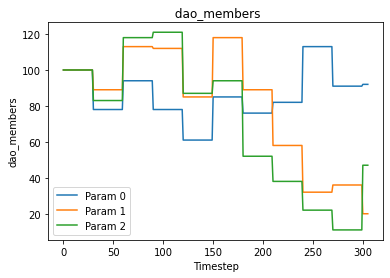

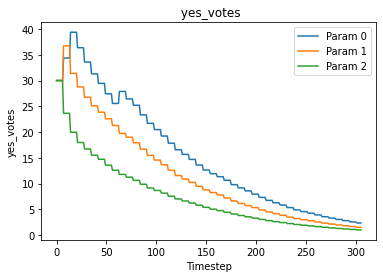

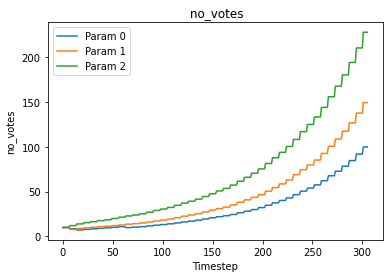

In [63]:
def parameter_sweep_plot(dfs, column):
  fig, ax = plt.subplots()
  x = pd.Series(dfs[0]["timestep"]).values
  for df in dfs:
    ax.plot(x, pd.Series(df[column]).values, label='Param '+ str(df['subset'][0])) 
  plt.xlabel('Timestep')
  plt.ylabel(column)
  ax.legend()
  plt.title(' ' + column)
  plt.show()

parameter_sweep_plot(dfs, 'dao_members')
parameter_sweep_plot(dfs, 'yes_votes')
parameter_sweep_plot(dfs, 'no_votes')
